<p align="left">
  <a href="https://colab.research.google.com/github/fernandoarcevega/AI_Workshop/blob/main/Part_3/01_CNN_MNIST/01_CNN_MNIST.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200">
  </a>
</p>

In [ ]:
###############################################
# Author 1: Wilfrido Gómez-Flores (CINVESTAV) #
# Author 2: Fernando Arce-Vega (CIO)          #
# e-mail 1: wilfrido.gomez@cinvestav.mx       #
# e-mail 2: farce@cio.mx                      #
# Date:     nov/03/2025                       #
# Subject:  CNN - MNIST                       #
###############################################

In [ ]:
# Change: Runtime to GPU

In [ ]:
# Check GPU details
!nvidia-smi

Sat Nov  1 02:14:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   70C    P0             33W /   70W |     634MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# MNIST Image classification using a CNN

In this exercise, we will implement the `LeNET-5` architecture to classify images of digits. For this, we will use the [`MNIST database`](http://yann.lecun.com/exdb/mnist/), which is a `Hello World` for deep learning.

The `MNIST database` consists of images of handwritten digits: 60,000 training images and `10,000` testing images. This database consists of `10` different classes, the digits `0` through `9`. The images have a dimension of `28x28` pixels.

In [ ]:
# Libraries
import numpy as np                                                    # Numerical array operations
import matplotlib.pyplot as plt                                       # Data plotting/visualization
import tensorflow as tf                                               # Machine learning
from sklearn.model_selection import train_test_split                  # Data split

In [ ]:
# Shuffle data
def shuffle_data(features, targets):
  id = np.random.permutation(len(targets))
  features = features[id, :]
  targets = targets[id]

  return features, targets

In [ ]:
# Download MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Split data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

In [ ]:
# Shuffle data
x_train, y_train = shuffle_data(x_train, y_train)
x_val, y_val = shuffle_data(x_val, y_val)
x_test, y_test = shuffle_data(x_test, y_test)

In [ ]:
# Check feature and targets shapes for training and testing
print(f'Training features shape:   {x_train.shape}')
print(f'Training targets shape:    {y_train.shape}\n')
print(f'Validation features shape: {x_val.shape}')
print(f'Validation targets shape:  {y_val.shape}\n')
print(f'Testing features shape:    {x_test.shape}')
print(f'Testing targets shape:     {y_test.shape}\n')

Training features shape:   (51000, 28, 28)
Training targets shape:    (51000,)

Validation features shape: (9000, 28, 28)
Validation targets shape:  (9000,)

Testing features shape:    (10000, 28, 28)
Testing targets shape:     (10000,)



Training images



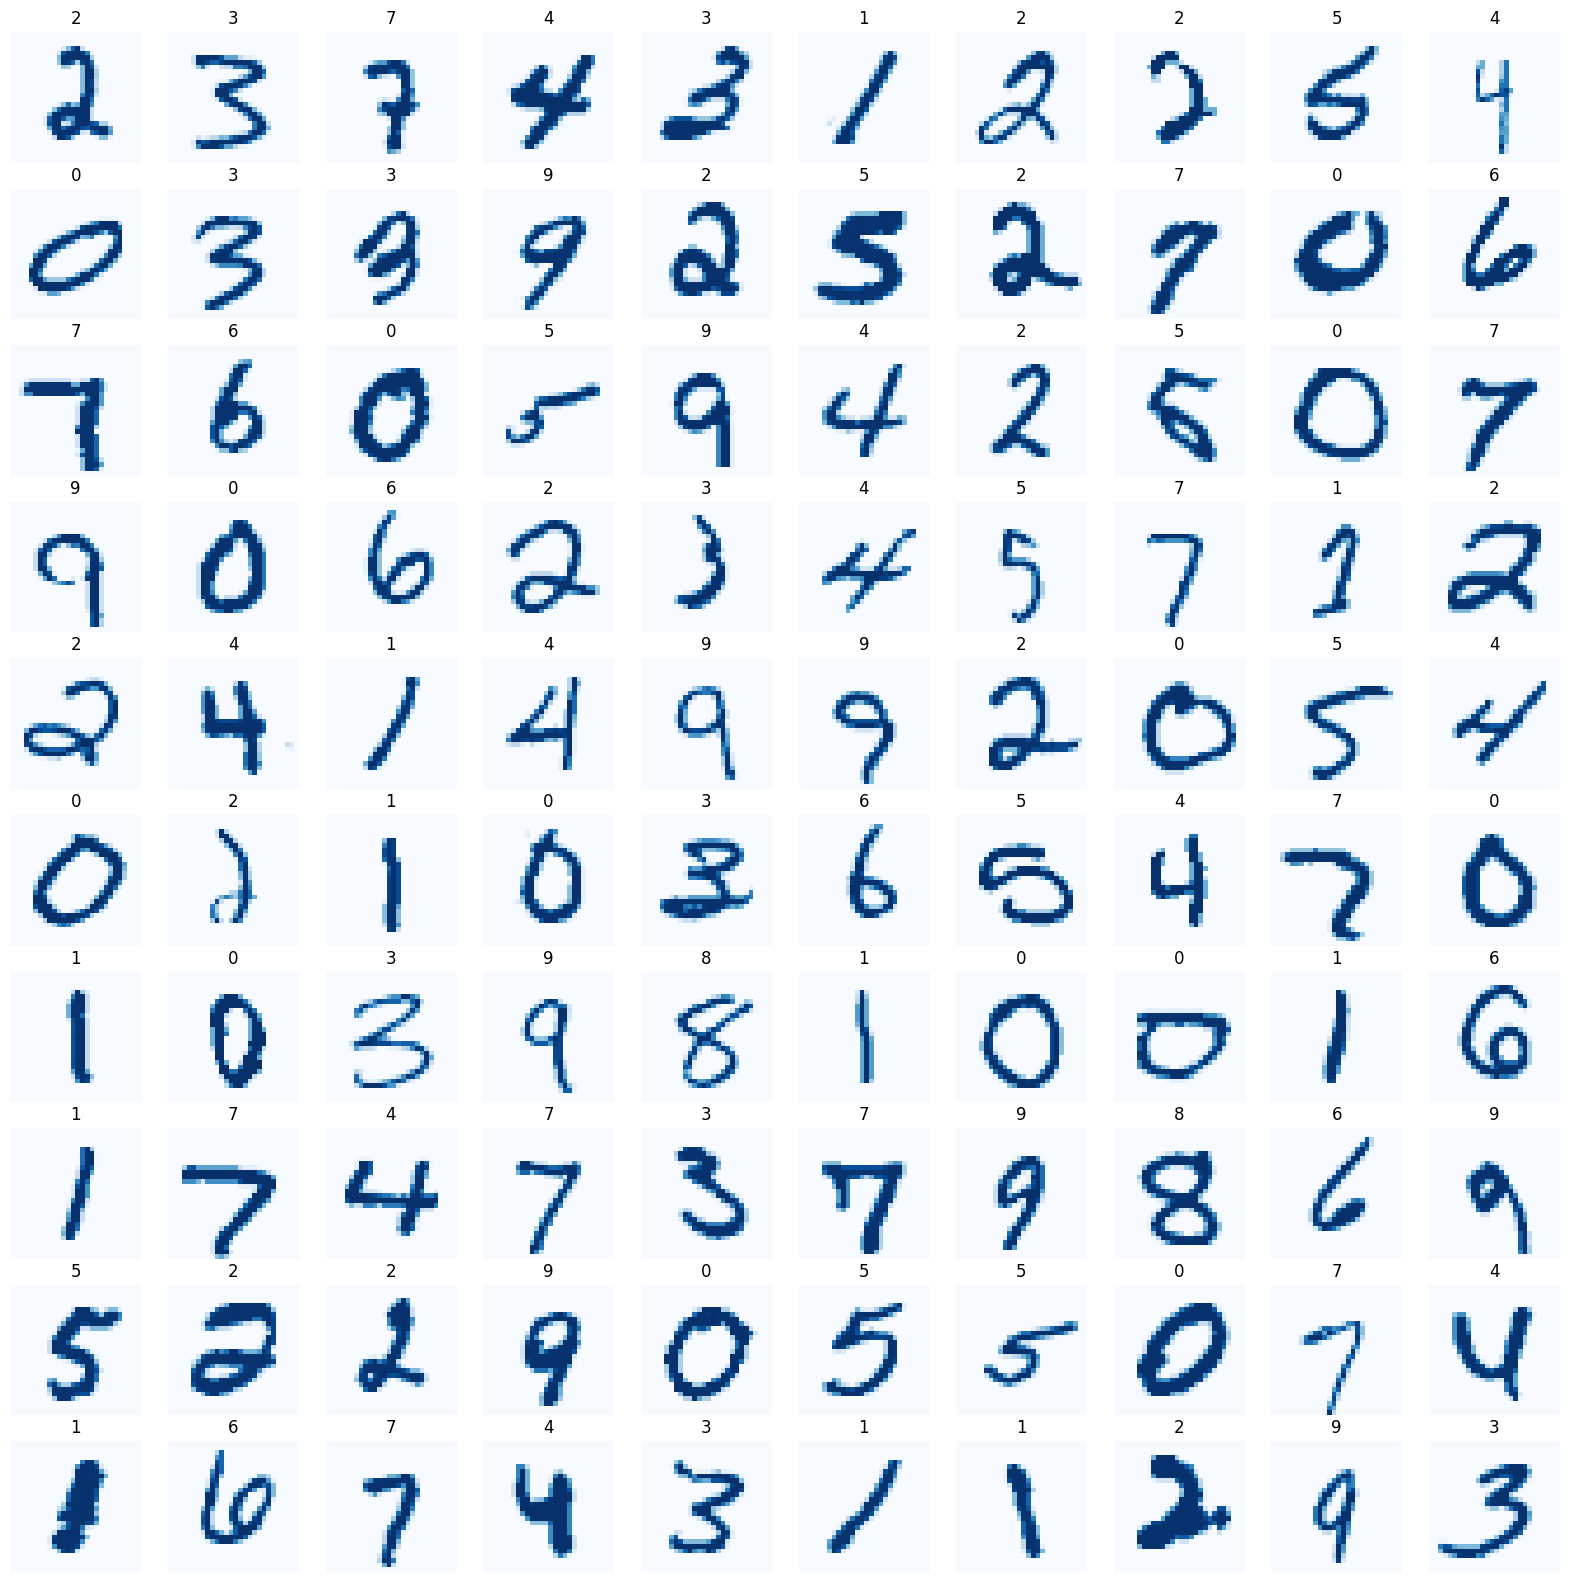

In [ ]:
# Data visualization
ncols = 10
nrows = 10

# Create figure
fig, axs = plt.subplots(figsize=(20, 20))
plt.axis('off')

print('Training images\n')

for i in range(ncols * nrows):

  axs = fig.add_subplot(nrows, ncols, i + 1)
  axs.imshow(x_train[i], cmap='Blues')
  axs.axis('off')

  label = str(y_train[i])
  plt.title(label)

plt.show()

In [ ]:
# Data preprocessing
x_train = x_train.reshape(len(x_train), 28, 28, 1).astype('float32')
x_test = x_test.reshape(len(x_test), 28, 28, 1).astype('float32')
x_val = x_val.reshape(len(x_val), 28, 28, 1).astype('float32')

# Data normalization
x_train /= 255.0
x_test /= 255.0
x_val /= 255.0

# One hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

In [ ]:
# Check feature and targets shapes for training and testing
print(f'Training features shape:   {x_train.shape}')
print(f'Training targets shape:    {y_train.shape}\n')
print(f'Validation features shape: {x_val.shape}')
print(f'Validation targets shape:  {y_val.shape}\n')
print(f'Testing features shape:    {x_test.shape}')
print(f'Testing targets shape:     {y_test.shape}\n')

Training features shape:   (51000, 28, 28, 1)
Training targets shape:    (51000, 10)

Validation features shape: (9000, 28, 28, 1)
Validation targets shape:  (9000, 10)

Testing features shape:    (10000, 28, 28, 1)
Testing targets shape:     (10000, 10)



In [ ]:
# Implement model
model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28, 28, 1), name='input_layer'),

        tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5),
                               strides=(1, 1), activation='tanh',
                               padding='valid'),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

        tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),
                               strides=(1, 1), activation='tanh',
                               padding='valid'),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(units=120, activation='tanh'),
        tf.keras.layers.Dense(units=84, activation='tanh'),
        tf.keras.layers.Dense(units=10, activation='softmax')
])

Model summary




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

Graphic representation


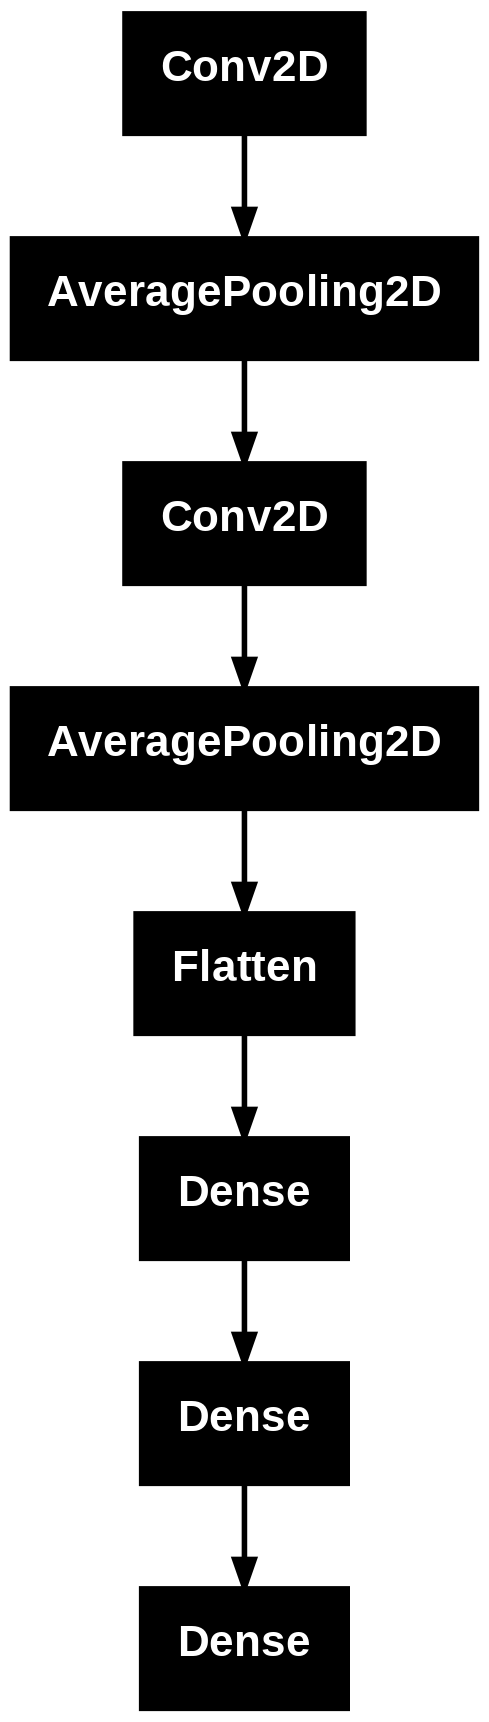

In [ ]:
# Model description
print('Model summary\n\n')
model.summary()

# Graphic representation
print('Graphic representation')
tf.keras.utils.plot_model(model)

In [ ]:
# Compile model
adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,   # Default
    beta_1=0.9,            # Default
    beta_2=0.999,          # Default
    epsilon=1e-07          # Default
)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

In [ ]:
# Train model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_data=(x_val, y_val),
                    verbose=2,
                    callbacks=[early_stop])

Epoch 1/20
399/399 - 9s - 22ms/step - accuracy: 0.8853 - loss: 0.3930 - val_accuracy: 0.9438 - val_loss: 0.1916
Epoch 2/20
399/399 - 1s - 3ms/step - accuracy: 0.9561 - loss: 0.1461 - val_accuracy: 0.9638 - val_loss: 0.1138
Epoch 3/20
399/399 - 1s - 3ms/step - accuracy: 0.9706 - loss: 0.0957 - val_accuracy: 0.9756 - val_loss: 0.0834
Epoch 4/20
399/399 - 2s - 4ms/step - accuracy: 0.9782 - loss: 0.0711 - val_accuracy: 0.9814 - val_loss: 0.0668
Epoch 5/20
399/399 - 1s - 3ms/step - accuracy: 0.9825 - loss: 0.0569 - val_accuracy: 0.9816 - val_loss: 0.0617
Epoch 6/20
399/399 - 1s - 3ms/step - accuracy: 0.9861 - loss: 0.0451 - val_accuracy: 0.9842 - val_loss: 0.0536
Epoch 7/20
399/399 - 1s - 3ms/step - accuracy: 0.9879 - loss: 0.0376 - val_accuracy: 0.9859 - val_loss: 0.0504
Epoch 8/20
399/399 - 3s - 6ms/step - accuracy: 0.9898 - loss: 0.0319 - val_accuracy: 0.9842 - val_loss: 0.0517
Epoch 9/20
399/399 - 1s - 3ms/step - accuracy: 0.9921 - loss: 0.0267 - val_accuracy: 0.9866 - val_loss: 0.0442


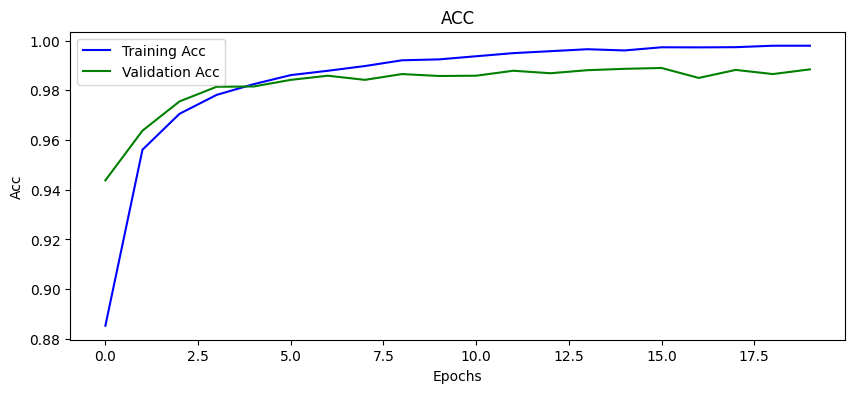

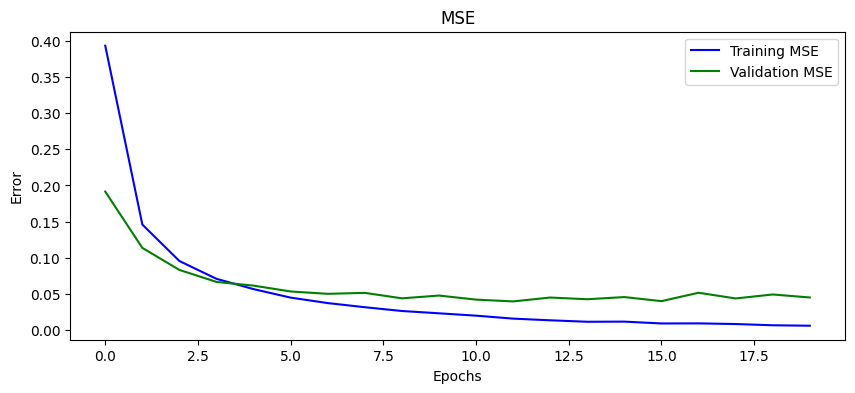

In [ ]:
# Training and validation graphs
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epocas = np.arange(len(training_loss))

plt.figure(figsize=(10, 4))
plt.plot(epocas, training_acc, color='blue', label='Training Acc')
plt.plot(epocas, validation_acc, color = 'green', label='Validation Acc')
plt.title('ACC')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()
print()

plt.figure(figsize = (10, 4))
plt.plot(epocas, training_loss, color='blue', label='Training MSE')
plt.plot(epocas, validation_loss, color = 'green', label='Validation MSE')
plt.title('MSE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
# Model prediction
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


Test images



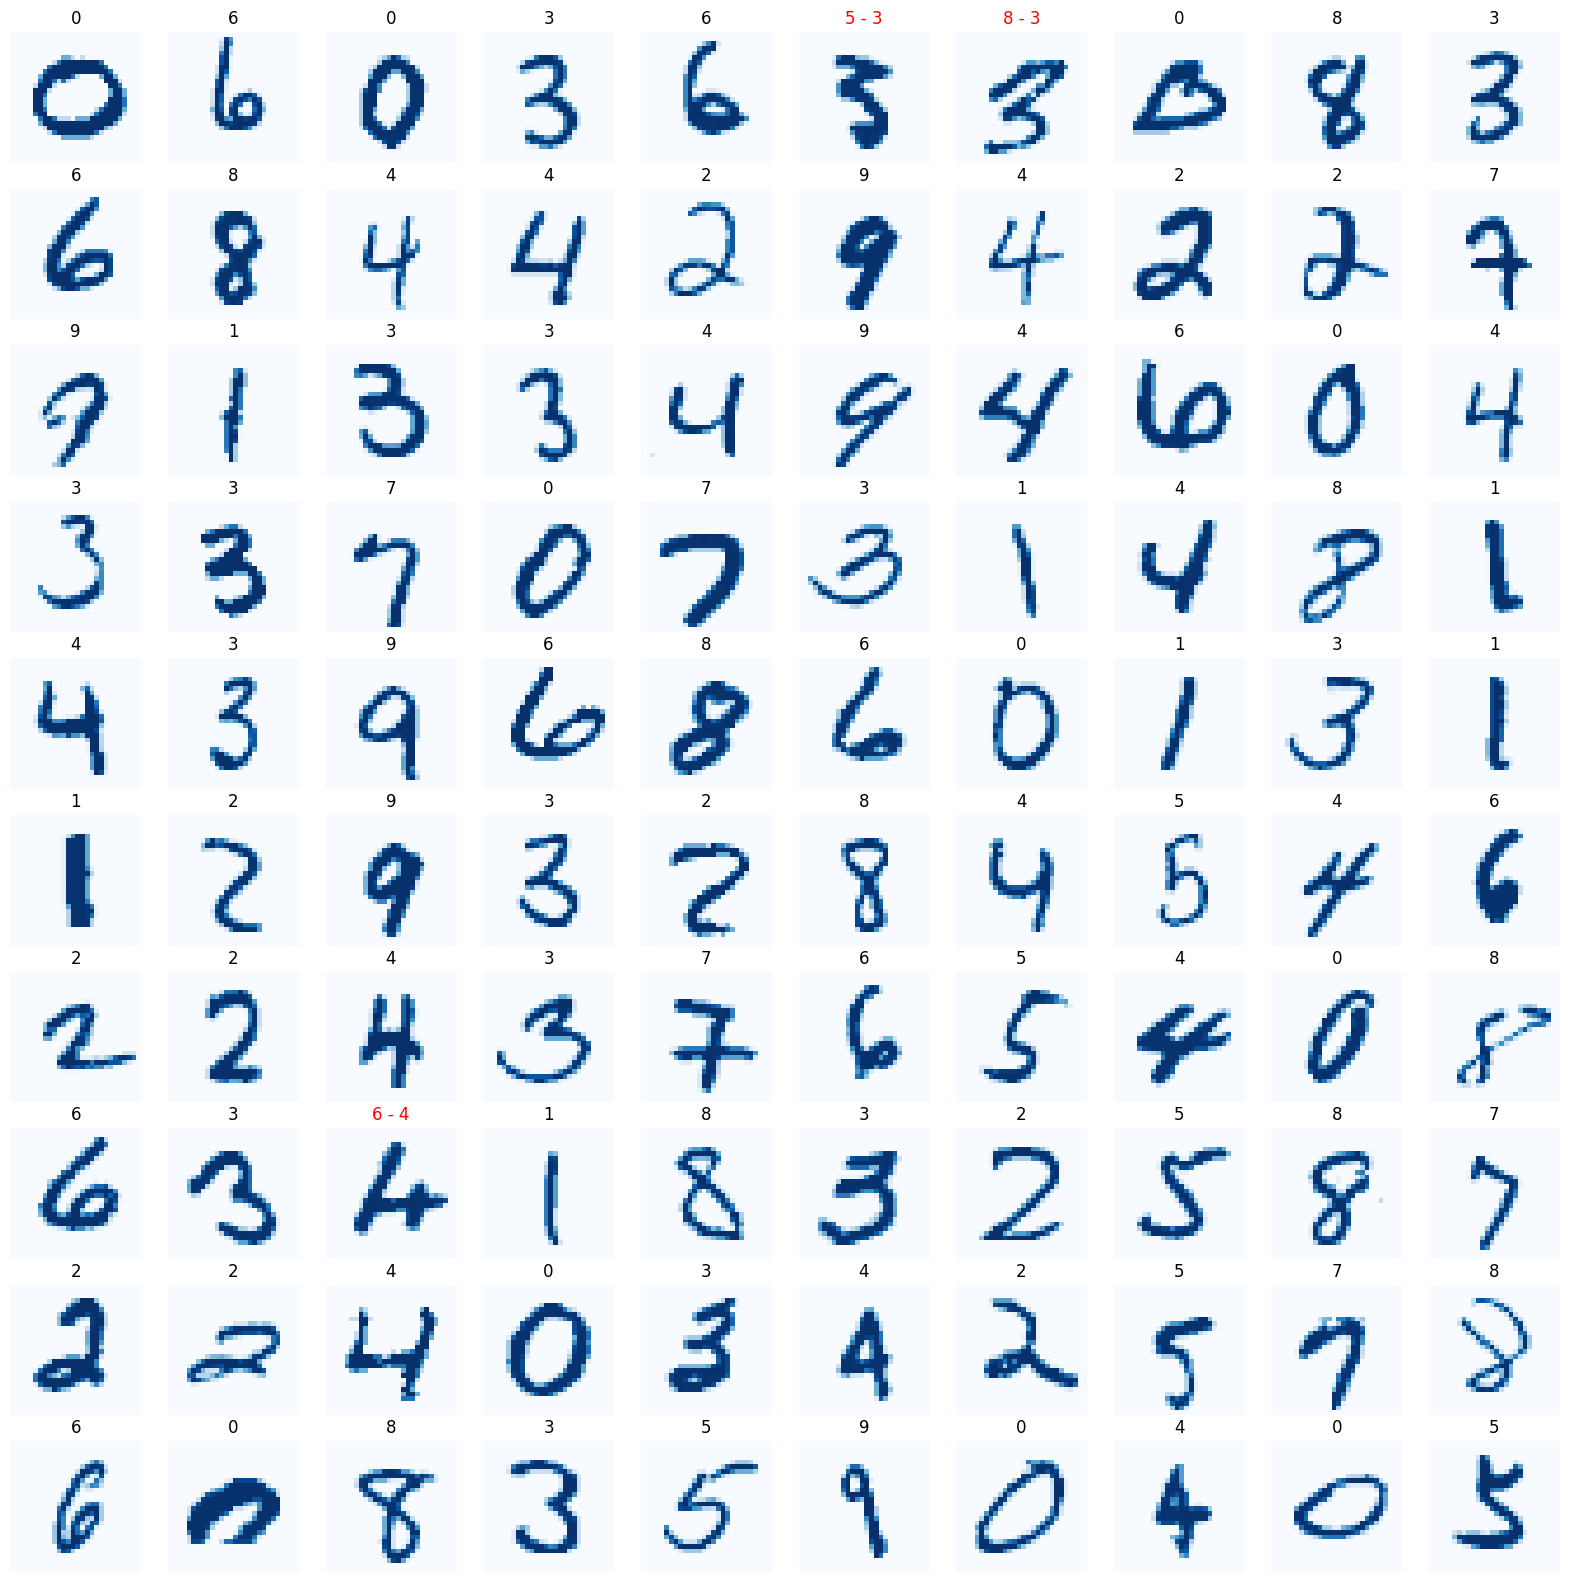

In [ ]:
# Data visualization
ncols = 10
nrows = 10

# Create figure
fig, axs = plt.subplots(figsize=(20, 20))
plt.axis('off')

print('Test images\n')

for i in range(ncols * nrows):

  axs = fig.add_subplot(nrows, ncols, i + 1)
  axs.imshow(x_test[i], cmap='Blues')
  axs.axis('off')

  # Check prediction
  if np.argmax(y_pred[i]) != np.argmax(y_test[i]):
    label = str(np.argmax(y_pred[i])) + ' - ' + str(np.argmax(y_test[i]))
    plt.title(label, color='red')

  else:
    label = str(np.argmax(y_pred[i]))
    plt.title(label)

plt.show()

In [ ]:
# Model performance
loss_training, acc_training = model.evaluate(x_train, y_train)
loss_validation, acc_validation = model.evaluate(x_val, y_val)
loss_testing, acc_testing = model.evaluate(x_test, y_test)

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9984 - loss: 0.0069
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9873 - loss: 0.0445
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9855 - loss: 0.0461


In [ ]:
# Print performance
print('Training loss:  ', loss_training)
print('Training acc:   ', acc_training)
print()
print('Validation loss:', loss_validation)
print('Validation acc: ', acc_validation)
print()
print('Test loss:      ', loss_testing)
print('Test acc:       ', acc_testing)

Training loss:   0.006916468497365713
Training acc:    0.998039186000824

Validation loss: 0.04028599336743355
Validation acc:  0.9890000224113464

Test loss:       0.04411808028817177
Test acc:        0.9865999817848206
